In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [81]:
data.shape

(400, 5)

In [82]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [83]:
# User id is not important to analyze the purchased data
data=data.drop(columns="User ID",axis=1)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [84]:
data.Age.unique()

array([19, 35, 26, 27, 32, 25, 20, 18, 29, 47, 45, 46, 48, 49, 31, 21, 28,
       33, 30, 23, 24, 22, 59, 34, 39, 38, 37, 42, 40, 36, 41, 58, 55, 52,
       60, 56, 53, 50, 51, 57, 44, 43, 54])

In [85]:
data.EstimatedSalary.unique()

array([ 19000,  20000,  43000,  57000,  76000,  58000,  84000, 150000,
        33000,  65000,  80000,  52000,  86000,  18000,  82000,  25000,
        26000,  28000,  29000,  22000,  49000,  41000,  23000,  30000,
        74000, 137000,  16000,  44000,  90000,  27000,  72000,  31000,
        17000,  51000, 108000,  15000,  79000,  54000, 135000,  89000,
        32000,  83000,  55000,  48000, 117000,  87000,  66000, 120000,
        63000,  68000, 113000, 112000,  42000,  88000,  62000, 118000,
        85000,  81000,  50000, 116000, 123000,  73000,  37000,  59000,
       149000,  21000,  35000,  71000,  61000,  75000,  53000, 107000,
        96000,  45000,  47000, 100000,  38000,  69000, 148000, 115000,
        34000,  60000,  70000,  36000,  39000, 134000, 101000, 130000,
       114000, 142000,  78000, 143000,  91000, 144000, 102000, 126000,
       133000, 147000, 104000, 146000, 122000,  97000,  95000, 131000,
        77000, 125000, 106000, 141000,  93000, 138000, 119000, 105000,
      

In [86]:
data['Purchased'].unique()

array([0, 1])

In [87]:
data.isnull().sum().sum()

0

In [88]:
data.corr()

/tmp/ipykernel_5796/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


/tmp/ipykernel_5796/2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

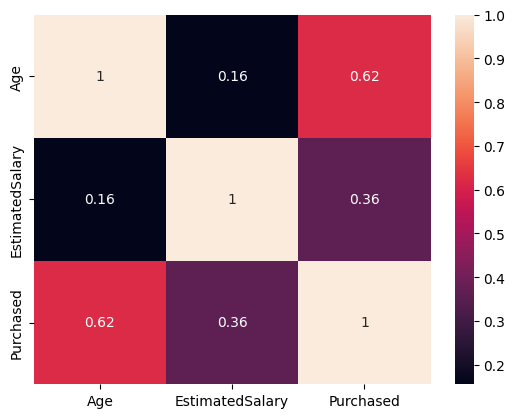

In [89]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot: >

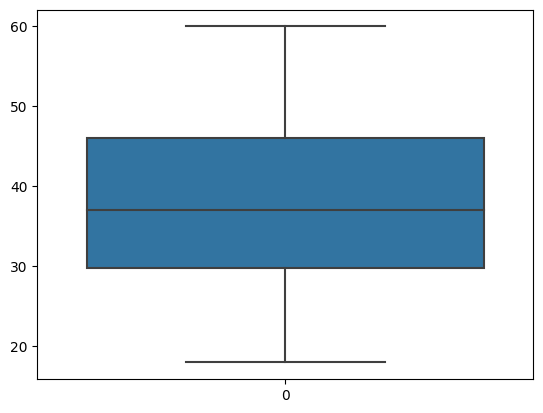

In [90]:
sns.boxplot(data.Age)

<AxesSubplot: >

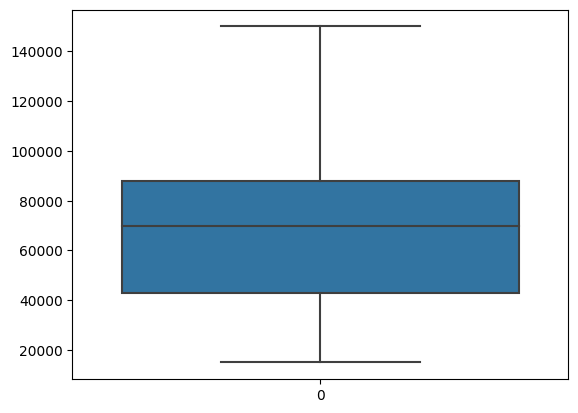

In [91]:
sns.boxplot(data.EstimatedSalary)

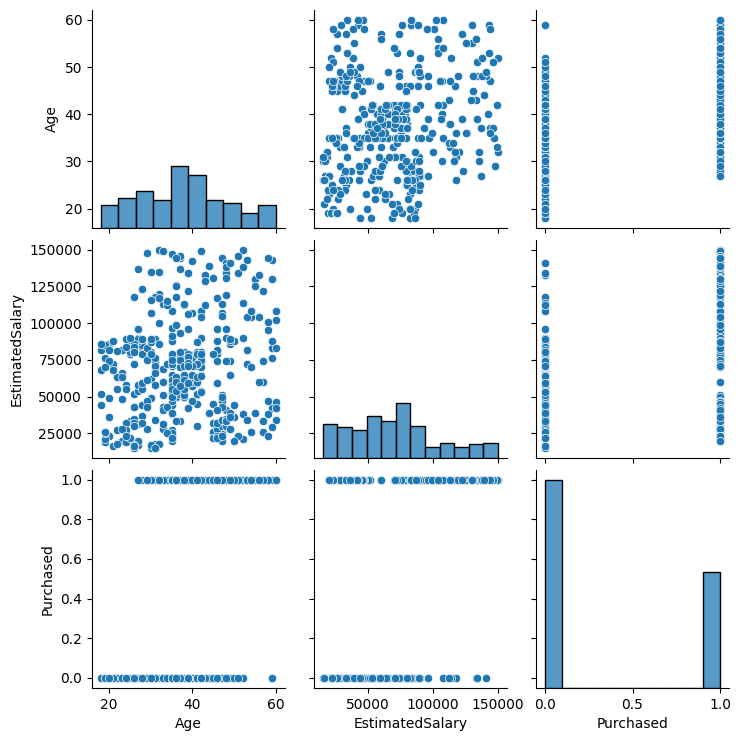

In [92]:
sns.pairplot(data)

<AxesSubplot: xlabel='Age', ylabel='EstimatedSalary'>

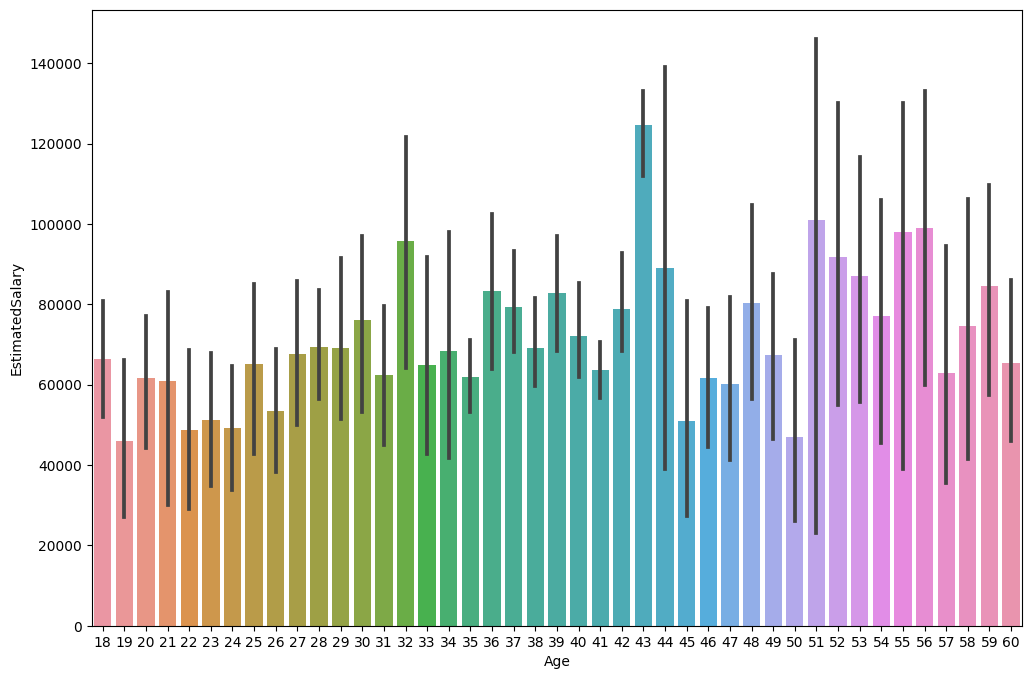

In [93]:
fit=plt.figure(figsize=(12,8))
sns.barplot(x=data['Age'],y=data.EstimatedSalary)

<AxesSubplot: xlabel='Age', ylabel='Purchased'>

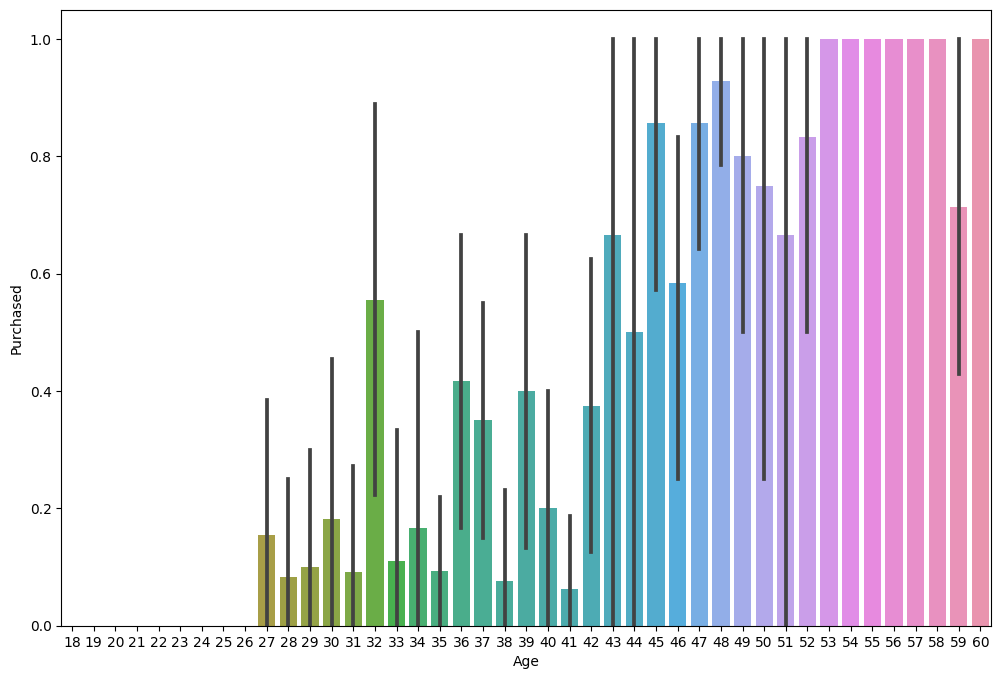

In [94]:
fig=plt.figure(figsize=[12,8])
sns.barplot(x=data['Age'],y=data['Purchased'])

In [95]:
data.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

<AxesSubplot: xlabel='Gender', ylabel='count'>

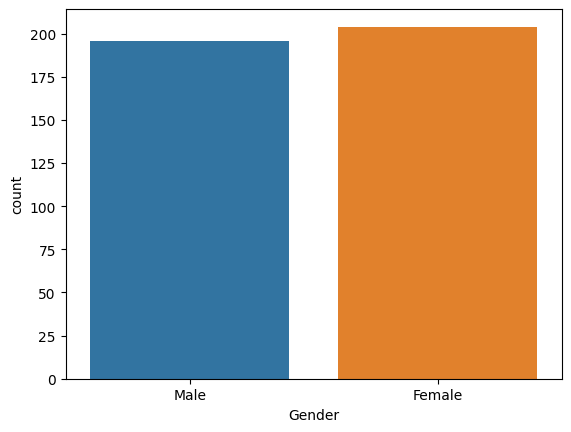

In [96]:
sns.countplot(x=data['Gender'])

<AxesSubplot: xlabel='Gender', ylabel='Purchased'>

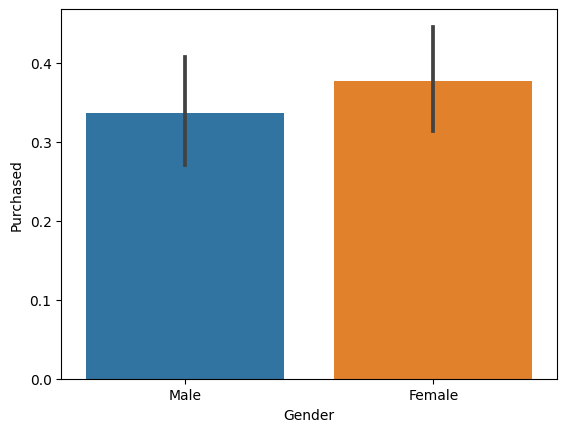

In [97]:
sns.barplot(x=data.Gender,y=data.Purchased)

##  Encoding

In [98]:
# converting the categorical data of gender to numerical
data['Gender'].replace({'Male':1,'Female':0},inplace=True)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [99]:
# Splitting the data
x=data.iloc[:,0:3]
y=data.iloc[:,-1]
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [100]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [101]:
col_name=x.columns
col_name

Index(['Gender', 'Age', 'EstimatedSalary'], dtype='object')

In [102]:
from sklearn.preprocessing import scale

In [103]:
x=scale(x)
x

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [104]:
x=pd.DataFrame(x,columns=col_name)
x

,Gender,Age,EstimatedSalary
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751
...,...,...,...
395,-0.980196,0.797057,-0.844019
396,1.020204,1.274623,-1.372587
397,-0.980196,1.179110,-1.460681
398,1.020204,-0.158074,-1.078938


In [105]:
# spliting the data for train and test
from sklearn.model_selection import train_test_split

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

## Logistic model building 

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [109]:
pred=log_reg.predict(x_test)

In [110]:
from sklearn import metrics

In [111]:
metrics.accuracy_score(y_test,pred)
# In classification we need to use accuracy_score not an r2_score

0.83

In [112]:
metrics.accuracy_score(y_train,log_reg.predict(x_train))

0.8566666666666667

In [113]:
metrics.confusion_matrix(y_test,pred)

array([[52,  6],
       [11, 31]])